#A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [148]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Kaggle competition/Banking data/Churn_Modelling.csv")

In [149]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
# Lets remove data Rownumber,Customer ID columns and Surname as dont provide any quantifiable Info

data = data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [151]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


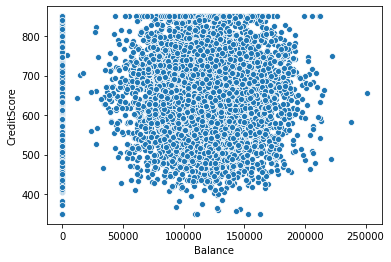

In [152]:
sns.scatterplot(data=data,x='Balance',y='CreditScore')

In [153]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [154]:
#Lets check if there are any missing values in data
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We dont have any null values let proceed ahead


In [155]:
#Lets check the data type for each variable in data

data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We have 2 object types,2 float types and rest all are integers

In [156]:
#Lets check if data is biased?

data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [157]:
#Lets split the data into Dependant and indepandant variables arrays

target = np.array([data['Exited'].values])


In [158]:
print(target)

[[1 0 1 ... 1 1 0]]


In [159]:
data = data.drop(['Exited'],axis=1)

In [160]:
#Lets isolate columns which are categorical in nature

categorical_var = data.select_dtypes(include=['object'])


In [161]:
categorical_var

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [162]:
#Lets perform Onehot encoding

from sklearn.preprocessing import OneHotEncoder
ohe_Cat_var = OneHotEncoder(sparse=False)

In [163]:
ohe_categorical = ohe_Cat_var.fit_transform(categorical_var)

In [164]:
ohe_categorical

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [165]:
data = data.drop(['Geography','Gender'],axis=1)

In [166]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [167]:
data = np.array(data.values)

In [168]:
data.ndim

2

In [169]:
data

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [170]:
features = data

In [171]:
features

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [172]:
features = np.concatenate((features,ohe_categorical),axis=1)

In [173]:
#Standardization

from sklearn.preprocessing import StandardScaler
scfeatures = StandardScaler()

In [174]:
features = scfeatures.fit_transform(features)

In [175]:
features

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [176]:
target = target.reshape(-1,1)

In [194]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=10)

In [195]:
#Lets check the shapes of train and test data

print('Training Set:',X_train.shape)
print('Testing Set:',X_test.shape)

Training Set: (8000, 13)
Testing Set: (2000, 13)


In [196]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [197]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
y_predict = classifier.predict(X_test)

In [199]:
# Check whether the model is genralized or not

print('Training Score:', classifier.score(X_train,y_train))
print('Validation Score:',classifier.score(X_test,y_test))

Training Score: 1.0
Validation Score: 0.856


In [200]:
#let see what we could achieve with Deep learning (Try to generalize the model with layer optimizers)

#lets first convert the target array into 2d

target.ndim

2

In [201]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=10)

In [203]:
#Import Tensorflow
import tensorflow as tf

#Modelling

#Step1 : Architecting the model

model = tf.keras.models.Sequential()

In [204]:
#Step2: Create Input Layer

model.add(tf.keras.layers.Dense(units=70,activation='relu',input_shape=(13,)))

In [205]:
#Step3: Create Intermediated layers

model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=200,activation="relu"))

#Step 4: Create an Output layer

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [212]:
#Step 5: Model Compilation

model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])


In [213]:
model.fit(X_train,y_train,epochs=500, validation_data=(X_test,y_test))

Epoch 1/500
250/250 [==============================] - 1s 6ms/step - loss: 0.0318 - accuracy: 0.9910 - val_loss: 2.4604 - val_accuracy: 0.8115
Epoch 2/500
250/250 [==============================] - 1s 5ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 4.0786 - val_accuracy: 0.8085
Epoch 3/500
250/250 [==============================] - 1s 5ms/step - loss: 0.0345 - accuracy: 0.9909 - val_loss: 2.4187 - val_accuracy: 0.8135
Epoch 4/500
250/250 [==============================] - 1s 5ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 3.1447 - val_accuracy: 0.8140
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 2.3247 - val_accuracy: 0.8105
Epoch 6/500
250/250 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 1.3964 - val_accuracy: 0.8145
Epoch 7/500
250/250 [==============================] - 1s 5ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 1.6908 - val_accuracy: 0.8120